In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

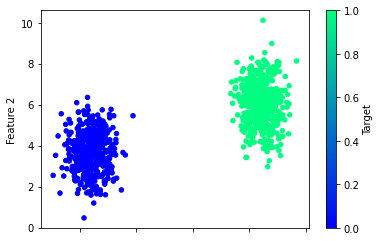

In [4]:
# Generate a dummy dataset
X,y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Create a DataFrame with dummy data
df = pd.DataFrame(X,columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plot the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [9]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=78)

In [10]:
# Create scalar instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [12]:
# Add first Dense later, including input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [13]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [14]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compile the Sequential model and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 825us/step - loss: 0.6979 - accuracy: 0.4776
Epoch 2/100
24/24 [==============================] - 0s 868us/step - loss: 0.6794 - accuracy: 0.5711
Epoch 3/100
24/24 [==============================] - 0s 867us/step - loss: 0.6757 - accuracy: 0.6058
Epoch 4/100
24/24 [==============================] - 0s 867us/step - loss: 0.6623 - accuracy: 0.6584
Epoch 5/100
24/24 [==============================] - 0s 777us/step - loss: 0.6466 - accuracy: 0.7479
Epoch 6/100
24/24 [==============================] - 0s 824us/step - loss: 0.6319 - accuracy: 0.8026
Epoch 7/100
24/24 [==============================] - 0s 737us/step - loss: 0.6088 - accuracy: 0.8663
Epoch 8/100
24/24 [==============================] - 0s 737us/step - loss: 0.5860 - accuracy: 0.9075
Epoch 9/100
24/24 [==============================] - 0s 650us/step - loss: 0.5540 - accuracy: 0.9623
Epoch 10/100
24/24 [==============================] - 0s 781us/step - loss: 0.5386 - accura

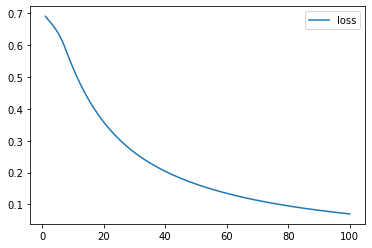

In [17]:
# Create a dataframe containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss as each iteration occured
history_df.plot(y="loss")

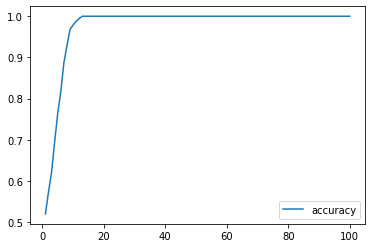

In [18]:
# Plot the accuracy as each iteration occured
history_df.plot(y="accuracy")

In [19]:
# Evaluate model using test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0658 - accuracy: 1.0000
Loss: 0.06584757566452026, Accuracy: 1.0


In [23]:
# Predict the classification of a brand new set of blob data
new_X, new_y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
#(nn_model.predict(new_X_scaled) > 0.5).astype("int32")
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

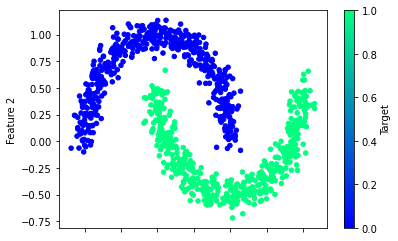

In [24]:
# Generate new dummy data
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")


In [25]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [26]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8256 - accuracy: 0.5867
Epoch 2/100
24/24 [==============================] - 0s 911us/step - loss: 0.7060 - accuracy: 0.6267
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6234 - accuracy: 0.6547
Epoch 4/100
24/24 [==============================] - 0s 997us/step - loss: 0.5704 - accuracy: 0.6813
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5306 - accuracy: 0.6933
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5003 - accuracy: 0.7107
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4748 - accuracy: 0.7227
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4536 - accuracy: 0.7387
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.7467
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.7707
Epoch

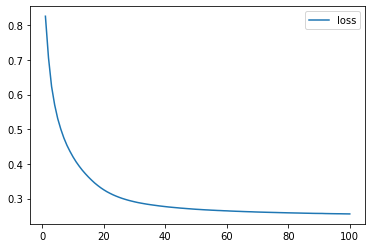

In [27]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

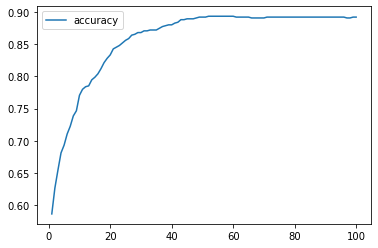

In [28]:
# Plot the loss
history_df.plot(y="accuracy")

In [29]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [30]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [31]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 823us/step - loss: 0.6259 - accuracy: 0.5630
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.6025
Epoch 3/100
24/24 [==============================] - 0s 780us/step - loss: 0.5639 - accuracy: 0.6354
Epoch 4/100
24/24 [==============================] - 0s 867us/step - loss: 0.5301 - accuracy: 0.6909
Epoch 5/100
24/24 [==============================] - 0s 650us/step - loss: 0.5073 - accuracy: 0.7057
Epoch 6/100
24/24 [==============================] - 0s 824us/step - loss: 0.4887 - accuracy: 0.7517
Epoch 7/100
24/24 [==============================] - 0s 694us/step - loss: 0.4685 - accuracy: 0.7779
Epoch 8/100
24/24 [==============================] - 0s 607us/step - loss: 0.4351 - accuracy: 0.8204
Epoch 9/100
24/24 [==============================] - 0s 780us/step - loss: 0.4252 - accuracy: 0.8448
Epoch 10/100
24/24 [==============================] - 0s 780us/step - loss: 0.4063 - accuracy